(30, 30)

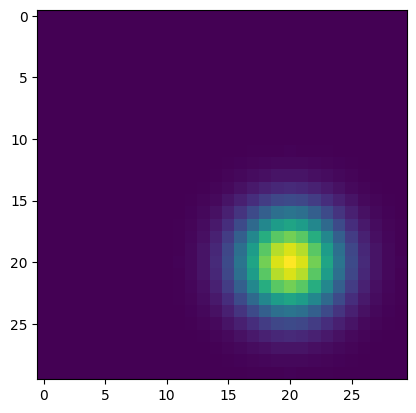

In [5]:
import json

import numpy as np
import matplotlib.pyplot as plt

minx, maxx = -100, 100
miny, maxy = -100, 100
stepsx, stepsy = 30, 30

x = np.linspace(minx, maxx, stepsx)
y = np.linspace(miny, maxy, stepsy)

X, Y = np.meshgrid(x, y)

"""
[[x0,x1]=y0,[x0,x1]=y1]
"""


def normalized(A):
    # Zeilensummen berechnen
    sub_matrix_sum = A.sum(axis=(2, 3), keepdims=True)
    # Matrix normalisieren
    normalized_matrix = A / sub_matrix_sum
    return normalized_matrix


def f(x, y, sigma=8):
    matrix = np.exp(-((X - x) ** 2 + (Y - y) ** 2) / (2 * sigma ** 2))
    return matrix / np.sum(matrix)


Q = np.array([[f(_x, _y, 20) for _x in x] for _y in y])


def next(A, i):
    N = np.sum(A * Q, axis=(2, 3)) + (f(0, 0, 1) if i % 20 < 10 else -f(20, -23, 1)) + np.random.rand(stepsx,
                                                                                                      stepsy) * 0.001

    #N = N/np.sum(N)
    return N


plt.imshow(Q[20, 20])
Q[0, 0].shape

'[\n    {\n        "name": "Afghanistan",\n        "code": "AFG",\n        "area": 647500,\n        "population": 26023100,\n        "population_city": 3371100,\n        "percentage_city": 0.12954259869116286,\n        "cities": [\n            {\n                "city": "Herat",\n                "population": "335200"\n            },\n            {\n                "city": "Kabul",\n                "population": "2435400"\n            },\n            {\n                "city": "Kandahar",\n                "population": "311800"\n            },\n            {\n                "city": "Mazar-i-Sharif",\n                "population": "288700"\n            }\n        ]\n    },\n    {\n        "name": "Albania",\n        "code": "AL",\n        "area": 28750,\n        "population": 2800138,\n        "population_city": 818187,\n        "percentage_city": 0.2921952418059396,\n        "cities": [\n            {\n                "city": "Durr\\u00ebs",\n                "population": "113249"\n  

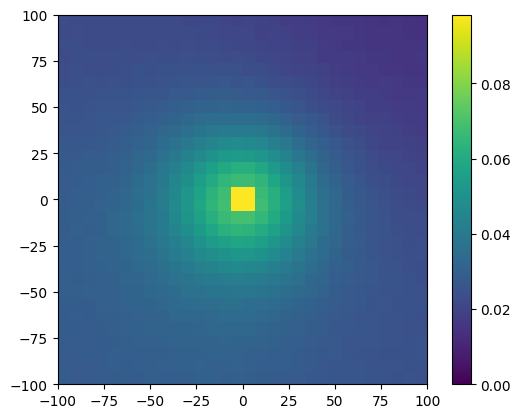

In [23]:
from matplotlib import animation
import json

S = f(0, 0)
S = S / np.sum(S)

fig = plt.figure()
im = plt.imshow(S, extent=(minx, maxx, miny, maxy))  #, vmin=-0.1,vmax=0.1)
plt.colorbar()


def animate(i):
    global S
    S = next(S, i)
    im.set_array(S)
    return im


ani = animation.FuncAnimation(fig, animate, repeat=True, frames=stepsy, interval=500)

from IPython.display import HTML

HTML(ani.to_jshtml(default_mode="loop"))


In [114]:
ani.save("population.gif", writer="imagemagick", fps=10)


MovieWriter imagemagick unavailable; using Pillow instead.


In [3]:
test = [1, 2, 3, 4]